> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The ultimate Soccer database for data analysis and machine learning : https://www.kaggle.com/hugomathien/soccer
These are the tables and the columns we will need to answer our questions:

>Match  
{'id' , 'country_id' , 'league_id' , 'season' , 'home_team_api_id' , 'away_team_api_id' , 'home_team_goal' , 'away_team_goal'}

>Player_Attributes

>Team_Attributes

>Team

### Question(s) for Analysis
We will try to answer the following quesions : 
> Which team has the most number of wins every year ?

> Which team has the most clean sheets every year ?

> Which team attributes are correlated to the number of wins ?

> Which team attributes are correlated to the number of clean sheets ?

> Which attributes of player rating are affected by age?

In [52]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [177]:
database_path = 'E:\courses\DataAnalysis\Course2\DataAnalysis\project\database\database.sqlite'
match_data_sql_query = 'select id , country_id , league_id , season , home_team_api_id , away_team_api_id , home_team_goal , away_team_goal from Match' 
player_attributes_data_sql_query = 'select * from Player_attributes'
team_attributes_data_sql_query = 'select * from Team_attributes'
team_data_sql_query = 'select * from Team'

#connecting to the database
connect = sqlite3.connect(database_path)
  
# getting tables data
match_df = pd.read_sql(match_data_sql_query, connect)
player_attributes_df = pd.read_sql(player_attributes_data_sql_query, connect)
team_attributes_df = pd.read_sql(team_attributes_data_sql_query, connect)
team_df = pd.read_sql(team_data_sql_query, connect)


In [178]:
match_df.head()

,id,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,9987,9993,1,1
1,2,1,1,2008/2009,10000,9994,0,0
2,3,1,1,2008/2009,9984,8635,0,3
3,4,1,1,2008/2009,9991,9998,5,0
4,5,1,1,2008/2009,7947,9985,1,3


In [179]:
player_attributes_df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [180]:
team_attributes_df.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [181]:
team_df.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [182]:
#no need to clean match table
match_df.info()
sum(match_df.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   home_team_api_id  25979 non-null  int64 
 5   away_team_api_id  25979 non-null  int64 
 6   home_team_goal    25979 non-null  int64 
 7   away_team_goal    25979 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.6+ MB


0

In [183]:
player_attributes_df.info() #there are some missing values we will need to drop them
sum(player_attributes_df.duplicated())  #0 duplicated rows no need to fix them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

0

In [184]:
#First we will drop columns that we don`t need
dropped_columns = ['preferred_foot' , 'attacking_work_rate' , 'defensive_work_rate' ]
player_attributes_df.drop(dropped_columns , axis = 1)

#Second we will drop rows which have null values
player_attributes_df.dropna(inplace = True) 


In [185]:

team_attributes_df.info() #lots of data missing from buildUpPlayDribbling column
sum(team_attributes_df.duplicated()) # 0 duplicates , no need to drop duplicates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

0

In [186]:
#First we will drop buildUpPlayDribbling
dropped_columns = ['buildUpPlayDribbling' ]
team_attributes_df.drop(dropped_columns , axis = 1 , inplace = True)

In [187]:
team_df.info() #lots of data missing from buildUpPlayDribbling column
sum(team_df.duplicated()) # 0 duplicates , no need to drop duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


0

In [188]:
#Dropping team_fifa_api_id column
dropped_columns = ['team_fifa_api_id' ]
team_df.drop(dropped_columns , axis = 1 , inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

In [189]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   home_team_api_id  25979 non-null  int64 
 5   away_team_api_id  25979 non-null  int64 
 6   home_team_goal    25979 non-null  int64 
 7   away_team_goal    25979 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 1.6+ MB


In [341]:
# To get the team with most number of wins every year we will add a column to match table to specify which team won
# we will put the id of the team winning , if it`s a draw we will put -1
match_df['winning_team_api_id'] = match_df['home_team_api_id']
match_df['losing_team_api_id'] = match_df['away_team_api_id']
match_df.loc[match_df['home_team_goal'] < match_df['away_team_goal'], 'winning_team_api_id'] = match_df['away_team_api_id']
match_df.loc[match_df['home_team_goal'] < match_df['away_team_goal'], 'losing_team_api_id'] = match_df['home_team_api_id']
match_df.loc[match_df['home_team_goal'] == match_df['away_team_goal'], 'winning_team_api_id'] = -1
match_df.loc[match_df['home_team_goal'] == match_df['away_team_goal'], 'losing_team_api_id'] = -1

match_df = match_df.drop(match_df[match_df['winning_team_api_id'] == -1].index)
match_df = match_df.drop(match_df[match_df['losing_team_api_id'] == -1].index)
match_df.head()

,id,country_id,league_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winning_team_api_id,losing_team_api_id
2,3,1,1,2008/2009,9984,8635,0,3,8635,9984
3,4,1,1,2008/2009,9991,9998,5,0,9991,9998
4,5,1,1,2008/2009,7947,9985,1,3,9985,7947
7,8,1,1,2008/2009,4049,9996,1,2,9996,4049
8,9,1,1,2008/2009,10001,9986,1,0,10001,9986


In [363]:
most_winning_teams = match_df.groupby('season')['winning_team_api_id'].agg(pd.Series.mode)
most_wins_count = match_df.groupby(['season','winning_team_api_id']).count()
most_wins_seasons = most_wins_count.groupby('season')['id'].max().keys()
most_wins_count = most_wins_count.groupby('season')['id'].max().values


In [364]:
most_losing_teams = match_df.groupby('season')['losing_team_api_id'].agg(pd.Series.mode)
most_losses_count = match_df.groupby(['season','losing_team_api_id']).count()
most_losses_seasons = most_losses_count.groupby('season')['id'].max().keys()
most_losses_count = most_losses_count.groupby('season')['id'].max().values


In [365]:
most_winning_teams_names = np.empty(len(most_winning_teams.values) , dtype = object)
i = 0
for id in most_winning_teams :
    if type(id) is np.int64:
        most_winning_teams_names[i] = team_df[team_df['team_api_id'] == id]['team_long_name'].values
    else :
        most_winning_teams_names[i] = team_df[team_df['team_api_id'].isin(id)]['team_long_name'].values
    i += 1
most_winning_teams_names


array([array(['Manchester United'], dtype=object),
       array(['Real Madrid CF', 'FC Barcelona'], dtype=object),
       array(['Rangers', 'FC Barcelona'], dtype=object),
       array(['Real Madrid CF'], dtype=object),
       array(['FC Barcelona'], dtype=object),
       array(['Juventus'], dtype=object),
       array(['Real Madrid CF', 'FC Barcelona'], dtype=object),
       array(['Paris Saint-Germain'], dtype=object)], dtype=object)

In [366]:
most_losing_teams_names = np.empty(len(most_losing_teams.values) , dtype = object)
i = 0
for id in most_losing_teams :
    if type(id) is np.int64:
        most_losing_teams_names[i] = team_df[team_df['team_api_id'] == id]['team_long_name'].values
    else :
        most_losing_teams_names[i] = team_df[team_df['team_api_id'].isin(id)]['team_long_name'].values
    i += 1
most_losing_teams_names


array([array(['Le Havre AC'], dtype=object),
       array(['RKC Waalwijk'], dtype=object),
       array(['Willem II', 'VVV-Venlo'], dtype=object),
       array(['Blackburn Rovers', 'Wolverhampton Wanderers', 'Excelsior',
              'Dunfermline Athletic'], dtype=object)                     ,
       array(['Pescara'], dtype=object),
       array(['FC Lausanne-Sports'], dtype=object),
       array(['St. Mirren'], dtype=object),
       array(['Aston Villa'], dtype=object)], dtype=object)

In [367]:
def arr_to_str(arr) :
    s = ""
    for i in arr :
        s += i
        s += '\n'
    
    return s
i = 0
for name in most_winning_teams_names :
    most_winning_teams_names[i] = arr_to_str(name)
    i += 1
i=0
for name in most_losing_teams_names :
    most_losing_teams_names[i] = arr_to_str(name)
    i += 1


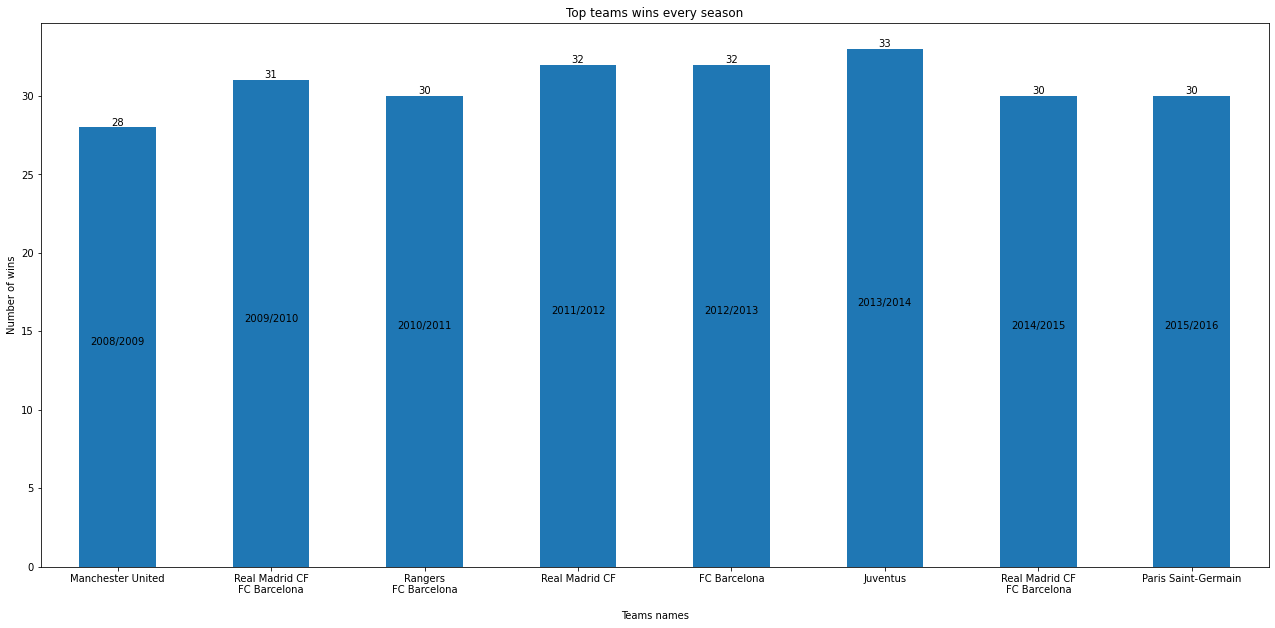

In [368]:
# Bring some raw data.
frequencies = most_wins_count
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = most_winning_teams_names

# Plot the figure.
plt.figure(figsize=(22, 10))
ax = freq_series.plot(kind="bar")
ax.set_title("Top teams wins every season")
ax.set_xlabel("Teams names")
ax.set_ylabel("Number of wins")
ax.set_xticklabels(x_labels , rotation = 0)

rects = ax.patches

# Make some labels.
labels = most_wins_seasons

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height - height/2 , label, ha="center", va="bottom"
    )
    
for rect, frequency in zip(rects, frequencies):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height , frequency, ha="center", va="bottom"
    )
        


plt.show()

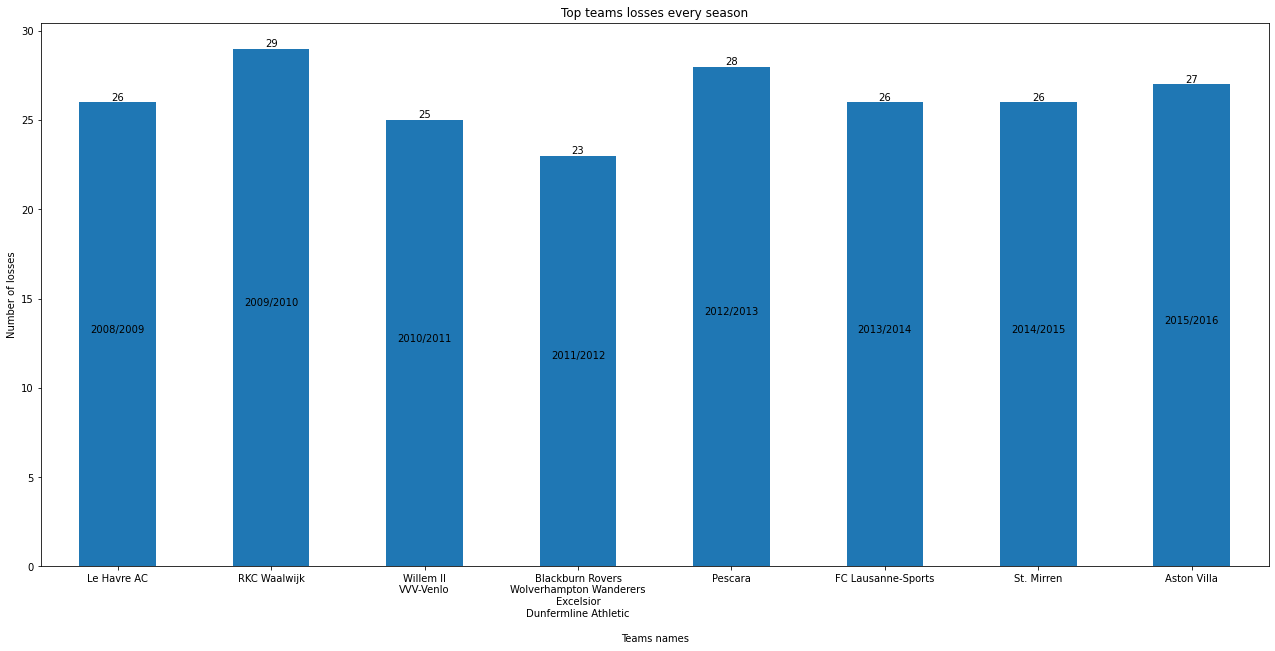

In [369]:
# Bring some raw data.
frequencies = most_losses_count
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = most_losing_teams_names

# Plot the figure.
plt.figure(figsize=(22, 10))
ax = freq_series.plot(kind="bar")
ax.set_title("Top teams losses every season")
ax.set_xlabel("Teams names")
ax.set_ylabel("Number of losses")
ax.set_xticklabels(x_labels , rotation = 0)

rects = ax.patches

# Make some labels.
labels = most_losses_seasons

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height - height/2 , label, ha="center", va="bottom"
    )
    
for rect, frequency in zip(rects, frequencies):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height , frequency, ha="center", va="bottom"
    )
        


plt.show()

### Research Question 2 : how teams attributes affect number of wins 

In [373]:
#Adding season column to the team attributes
year = pd.to_datetime(team_attributes_df['date']).dt.year
date = year.astype(str) + '/' + (year + 1).astype(str)
team_attributes_df['season'] = date
team_attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              1458 non-null   int64 
 1   team_fifa_api_id                1458 non-null   int64 
 2   team_api_id                     1458 non-null   int64 
 3   date                            1458 non-null   object
 4   buildUpPlaySpeed                1458 non-null   int64 
 5   buildUpPlaySpeedClass           1458 non-null   object
 6   buildUpPlayDribblingClass       1458 non-null   object
 7   buildUpPlayPassing              1458 non-null   int64 
 8   buildUpPlayPassingClass         1458 non-null   object
 9   buildUpPlayPositioningClass     1458 non-null   object
 10  chanceCreationPassing           1458 non-null   int64 
 11  chanceCreationPassingClass      1458 non-null   object
 12  chanceCreationCrossing          1458 non-null   

In [374]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19383 entries, 2 to 25978
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   19383 non-null  int64 
 1   country_id           19383 non-null  int64 
 2   league_id            19383 non-null  int64 
 3   season               19383 non-null  object
 4   home_team_api_id     19383 non-null  int64 
 5   away_team_api_id     19383 non-null  int64 
 6   home_team_goal       19383 non-null  int64 
 7   away_team_goal       19383 non-null  int64 
 8   winning_team_api_id  19383 non-null  int64 
 9   losing_team_api_id   19383 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 2.1+ MB


In [375]:
drop = ['country_id' , 'league_id' , 'home_team_api_id' , 'away_team_api_id'  , 'home_team_goal' , 'away_team_goal' ]
winning_team_matches = match_df.drop(drop , axis = 1)
winning_team_matches = winning_team_matches.groupby(['winning_team_api_id' , 'season']).count().reset_index()
winning_team_matches_attributes = pd.merge(winning_team_matches,team_attributes_df, how = 'inner' ,left_on=['season' , 'winning_team_api_id'] , right_on=['season' , 'team_api_id'])
winning_team_matches_attributes.rename(columns = {'id_x': 'wins_count'} , inplace = True)
winning_team_matches_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 0 to 1041
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   winning_team_api_id             1042 non-null   int64 
 1   season                          1042 non-null   object
 2   wins_count                      1042 non-null   int64 
 3   losing_team_api_id              1042 non-null   int64 
 4   id_y                            1042 non-null   int64 
 5   team_fifa_api_id                1042 non-null   int64 
 6   team_api_id                     1042 non-null   int64 
 7   date                            1042 non-null   object
 8   buildUpPlaySpeed                1042 non-null   int64 
 9   buildUpPlaySpeedClass           1042 non-null   object
 10  buildUpPlayDribblingClass       1042 non-null   object
 11  buildUpPlayPassing              1042 non-null   int64 
 12  buildUpPlayPassingClass         1042 non-null   

In [386]:
drop = ['country_id' , 'league_id' , 'home_team_api_id' , 'away_team_api_id'  , 'home_team_goal' , 'away_team_goal' ]
losing_team_matches = match_df.drop(drop , axis = 1)
losing_team_matches = losing_team_matches.groupby(['losing_team_api_id' , 'season']).count().reset_index()
losing_team_matches_attributes = pd.merge(losing_team_matches,team_attributes_df, how = 'inner' ,left_on=['season' , 'losing_team_api_id'] , right_on=['season' , 'team_api_id'])
losing_team_matches_attributes.rename(columns = {'id_x': 'losses_count'} , inplace = True)
losing_team_matches_attributes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1039 entries, 0 to 1038
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   losing_team_api_id              1039 non-null   int64 
 1   season                          1039 non-null   object
 2   losses_count                    1039 non-null   int64 
 3   winning_team_api_id             1039 non-null   int64 
 4   id_y                            1039 non-null   int64 
 5   team_fifa_api_id                1039 non-null   int64 
 6   team_api_id                     1039 non-null   int64 
 7   date                            1039 non-null   object
 8   buildUpPlaySpeed                1039 non-null   int64 
 9   buildUpPlaySpeedClass           1039 non-null   object
 10  buildUpPlayDribblingClass       1039 non-null   object
 11  buildUpPlayPassing              1039 non-null   int64 
 12  buildUpPlayPassingClass         1039 non-null   

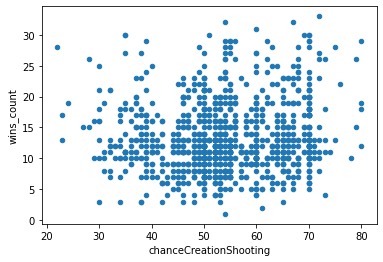

In [398]:
x = winning_team_matches_attributes.groupby(['winning_team_api_id' , 'season']).count().reset_index()
# x['winning_team_api_id' == 274581 and season == '2015/2016']
winning_team_matches_attributes.plot(x='chanceCreationShooting', y= 'wins_count', kind = 'scatter');

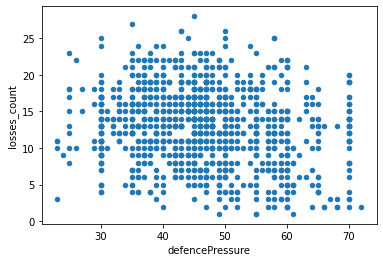

In [387]:
x = losing_team_matches_attributes.groupby(['losing_team_api_id' , 'season']).count().reset_index()
losing_team_matches_attributes.plot(x='defencePressure', y= 'losses_count', kind = 'scatter');

In [395]:

year = pd.to_datetime(player_attributes_df['date']).dt.year
date = year.astype(str) + '/' + (year + 1).astype(str)
player_attributes_df['season'] = date
player_attributes_df.info()
# player_attributes_df.groupby(['season' , 'team_api_id'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   180354 non-null  int64  
 1   player_fifa_api_id   180354 non-null  int64  
 2   player_api_id        180354 non-null  int64  
 3   date                 180354 non-null  object 
 4   overall_rating       180354 non-null  float64
 5   potential            180354 non-null  float64
 6   preferred_foot       180354 non-null  object 
 7   attacking_work_rate  180354 non-null  object 
 8   defensive_work_rate  180354 non-null  object 
 9   crossing             180354 non-null  float64
 10  finishing            180354 non-null  float64
 11  heading_accuracy     180354 non-null  float64
 12  short_passing        180354 non-null  float64
 13  volleys              180354 non-null  float64
 14  dribbling            180354 non-null  float64
 15  curve            

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])